In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

sns.set_style("darkgrid")

sns.set(rc={'figure.figsize':(8.7,6.27)})

warnings.filterwarnings('ignore') 

pd.options.display.max_columns=999 

import os

In [2]:
from sklearn.datasets import load_iris
iris = load_iris()

In [3]:
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [4]:
iris_features = iris.feature_names

In [5]:
df_data = pd.DataFrame(iris.data, columns = iris_features)
df_labels = pd.DataFrame(iris.target, columns = ['Species'])
data=pd.concat([df_data,df_labels],axis=1)

In [6]:
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   Species            150 non-null    int32  
dtypes: float64(4), int32(1)
memory usage: 5.4 KB


In [8]:
data.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [9]:
data['Species'].value_counts()

0    50
1    50
2    50
Name: Species, dtype: int64

In [10]:
rows, col = data.shape
print("Rows : %s, column : %s" % (rows, col))

Rows : 150, column : 5


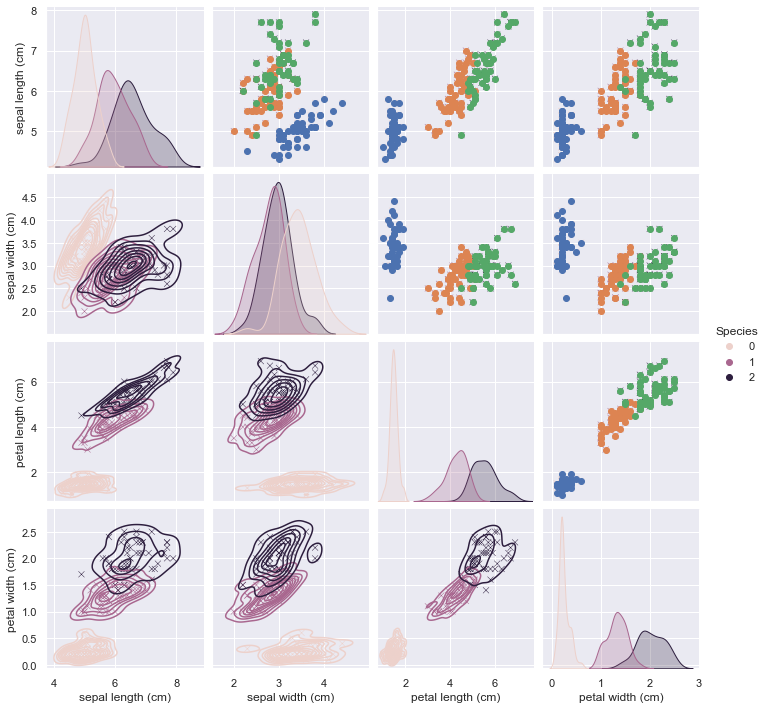

In [11]:
snsdata = data
g = sns.pairplot(snsdata, hue='Species', markers='x')
g = g.map_upper(plt.scatter)
g = g.map_lower(sns.kdeplot)

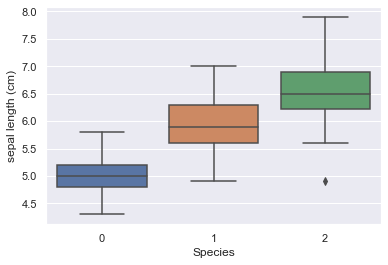

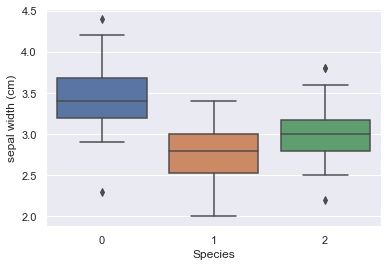

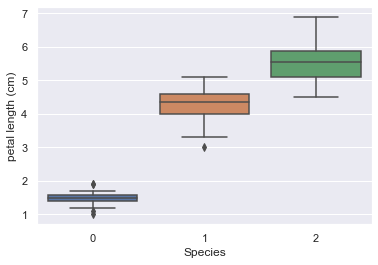

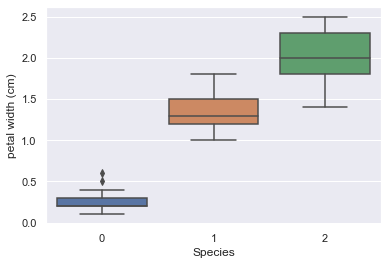

In [12]:
sns.boxplot(y='sepal length (cm)', x='Species', data=data)
plt.show()
sns.boxplot(y='sepal width (cm)', x='Species', data=data)
plt.show()
sns.boxplot(y='petal length (cm)', x='Species', data=data)
plt.show()
sns.boxplot(y='petal width (cm)', x='Species', data=data)
plt.show()

In [13]:
mapping = {
    'Iris-setosa' : 1,
    'Iris-versicolor' : 2,
    'Iris-virginica' : 3
}

X = data.drop(['Species'], axis=1).values 
y = data.Species.replace(mapping).values.reshape(rows,1) 

X = np.hstack(((np.ones((rows,1))), X))

In [14]:
np.random.seed(0)
theta = np.random.randn(1,5)

print("Theta : %s" % (theta))

Theta : [[1.76405235 0.40015721 0.97873798 2.2408932  1.86755799]]


In [15]:
iteration = 10000
learning_rate = 0.003
J = np.zeros(iteration)

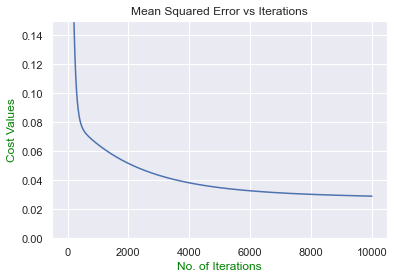

In [16]:
for i in range(iteration):
    J[i] = (1/(2 * rows) * np.sum((np.dot(X, theta.T) - y) ** 2 ))
    theta -= ((learning_rate/rows) * np.dot((np.dot(X, theta.T) - y).reshape(1,rows), X))

prediction = np.round(np.dot(X, theta.T))

ax = plt.subplot(111)
ax.plot(np.arange(iteration), J)
ax.set_ylim([0,0.15])
plt.ylabel("Cost Values", color="Green")
plt.xlabel("No. of Iterations", color="Green")
plt.title("Mean Squared Error vs Iterations")
plt.show()

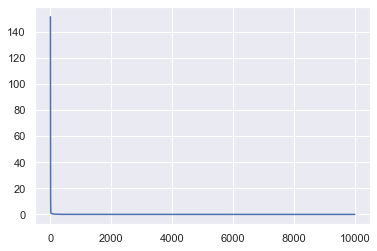

In [17]:
ax = sns.lineplot(x=np.arange(iteration), y=J)
plt.show()

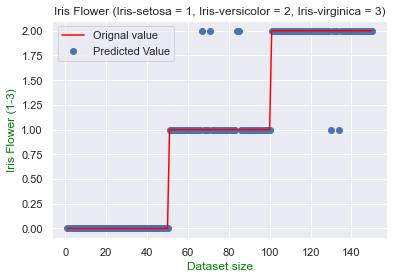

In [18]:
ax = plt.subplot(111)

ax.plot(np.arange(1, 151, 1), y, label='Orignal value', color='red')
ax.scatter(np.arange(1, 151, 1), prediction, label='Predicted Value')

plt.xlabel("Dataset size", color="Green")
plt.ylabel("Iris Flower (1-3)", color="Green")
plt.title("Iris Flower (Iris-setosa = 1, Iris-versicolor = 2, Iris-virginica = 3)")

ax.legend()
plt.show()

In [19]:
accuracy = (sum(prediction == y)/float(len(y)) * 100)[0]
print("The model predicted values of Iris dataset with an overall accuracy of %s" % (accuracy))

The model predicted values of Iris dataset with an overall accuracy of 96.0
